Install Dependies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
# Read the downloaded CSV into a pandas DataFrame
df = pd.read_csv(r"C:\Users\laxmi\Downloads\finance_data_large.csv")

# Display the DataFrame
print(df)

            Date    Amount           Description   Category
0     2023-12-29  12215.04        Gym Membership     Health
1     2023-02-18   1907.94       Credit Card EMI      Loans
2     2023-10-24    698.69            Water Bill  Utilities
3     2023-12-17  14651.54             Uber Ride  Transport
4     2023-12-27  43602.72  Monthly Rent Payment       Rent
...          ...       ...                   ...        ...
1090  2023-11-12  34438.24     Personal Loan EMI      Loans
1091  2023-11-20  29053.92        Organic Market  Groceries
1092  2023-06-10  22814.83              Pharmacy     Health
1093  2023-02-18  32122.25         Mall Purchase   Shopping
1094  2023-09-30   6098.13      Electricity Bill  Utilities

[1095 rows x 4 columns]


In [5]:
df.head

<bound method NDFrame.head of             Date    Amount           Description   Category
0     2023-12-29  12215.04        Gym Membership     Health
1     2023-02-18   1907.94       Credit Card EMI      Loans
2     2023-10-24    698.69            Water Bill  Utilities
3     2023-12-17  14651.54             Uber Ride  Transport
4     2023-12-27  43602.72  Monthly Rent Payment       Rent
...          ...       ...                   ...        ...
1090  2023-11-12  34438.24     Personal Loan EMI      Loans
1091  2023-11-20  29053.92        Organic Market  Groceries
1092  2023-06-10  22814.83              Pharmacy     Health
1093  2023-02-18  32122.25         Mall Purchase   Shopping
1094  2023-09-30   6098.13      Electricity Bill  Utilities

[1095 rows x 4 columns]>

In [6]:
df.shape

(1095, 4)

In [7]:
df.describe

<bound method NDFrame.describe of             Date    Amount           Description   Category
0     2023-12-29  12215.04        Gym Membership     Health
1     2023-02-18   1907.94       Credit Card EMI      Loans
2     2023-10-24    698.69            Water Bill  Utilities
3     2023-12-17  14651.54             Uber Ride  Transport
4     2023-12-27  43602.72  Monthly Rent Payment       Rent
...          ...       ...                   ...        ...
1090  2023-11-12  34438.24     Personal Loan EMI      Loans
1091  2023-11-20  29053.92        Organic Market  Groceries
1092  2023-06-10  22814.83              Pharmacy     Health
1093  2023-02-18  32122.25         Mall Purchase   Shopping
1094  2023-09-30   6098.13      Electricity Bill  Utilities

[1095 rows x 4 columns]>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Aggregate total spending per category
category_spending = df.groupby("Category")["Amount"].sum().sort_values(ascending=False)

Visualizations

C:\Users\laxmi\AppData\Local\Temp\ipykernel_19144\215820432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_spending.index, y=category_spending.values, palette="viridis")


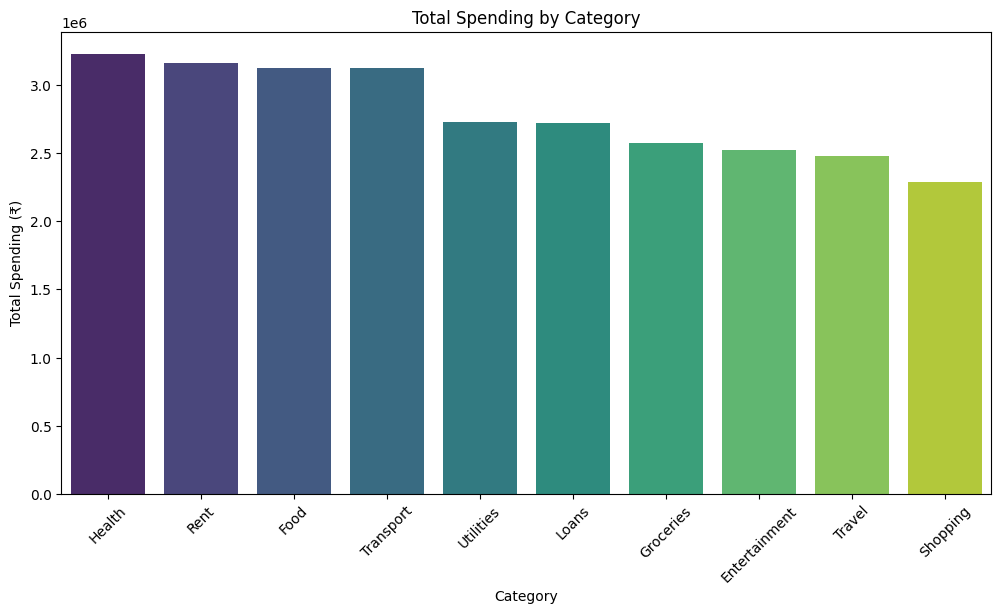

In [11]:
# Plot 1: Spending per Category (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_spending.index, y=category_spending.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Spending (₹)")
plt.title("Total Spending by Category")
plt.show()

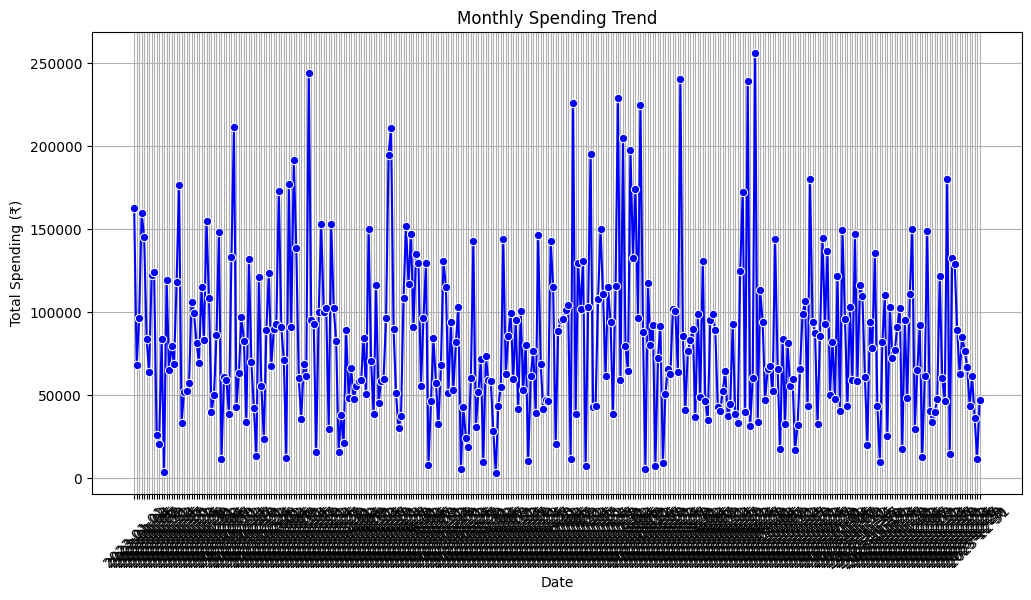

In [12]:
# Calculate monthly spending before creating the plot
monthly_spending = df.groupby("Date")["Amount"].sum()
# Plot 2: Monthly Spending Trend (Line Chart)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_spending.index.astype(str), y=monthly_spending.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Total Spending (₹)")
plt.title("Monthly Spending Trend")
plt.grid(True)
plt.show()

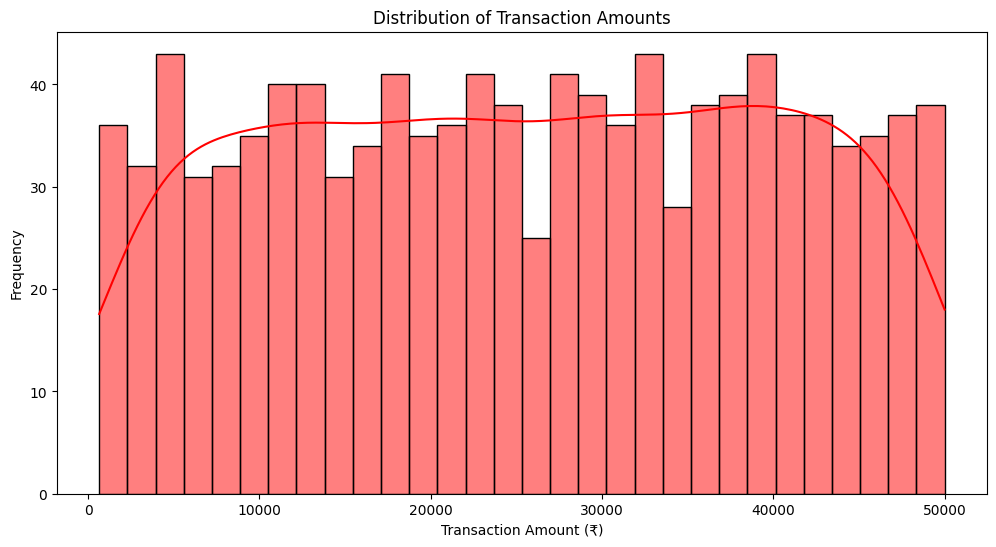

In [13]:
# Plot 3: Distribution of Transaction Amounts (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(df["Amount"], bins=30, kde=True, color="r")
plt.xlabel("Transaction Amount (₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()

C:\Users\laxmi\AppData\Local\Temp\ipykernel_19144\517023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Amount", data=df, palette="coolwarm")


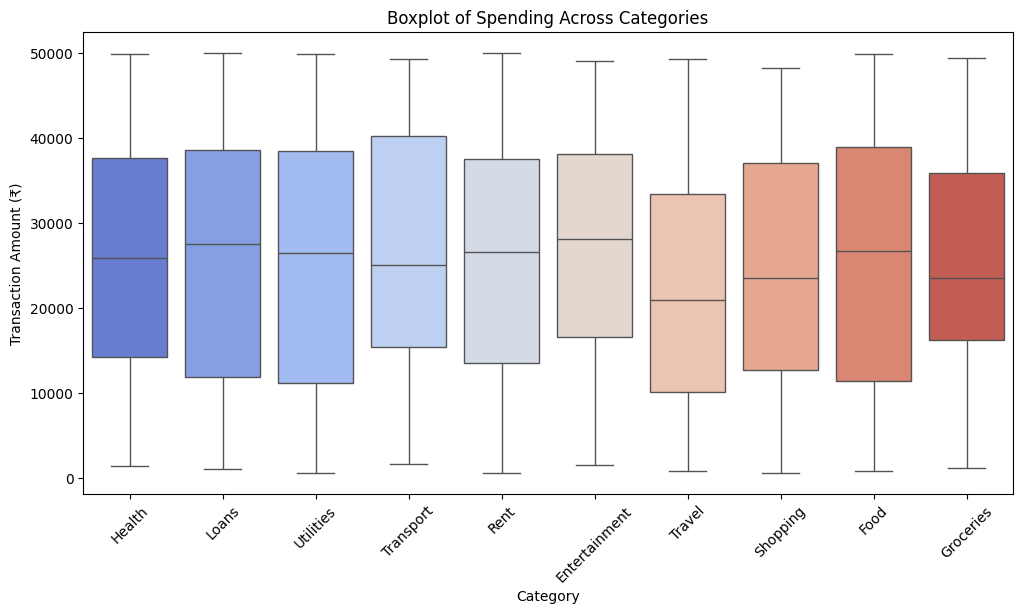

In [14]:
# Boxplot: Distribution of Spending Across Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Amount", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Transaction Amount (₹)")
plt.title("Boxplot of Spending Across Categories")
plt.show()

Normalization

In [16]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

Feature Selection

In [18]:
# Features and Target
X = df[['Amount']]
y = df['Category']

In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Model (Expense Categorization)

In [21]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Save Model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [23]:
# Save Label Encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("Random Forest Model Saved!")

Random Forest Model Saved!


In [24]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Import accuracy_score, classification_report, and confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Additional Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 10.96%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.05      0.05      0.05        21
           2       0.11      0.07      0.09        27
           3       0.14      0.15      0.15        26
           4       0.18      0.31      0.23        13
           5       0.09      0.07      0.08        27
           6       0.12      0.11      0.11        18
           7       0.14      0.20      0.17        20
           8       0.14      0.11      0.12        28
           9       0.10      0.09      0.09        22

    accuracy                           0.11       219
   macro avg       0.11      0.12      0.11       219
weighted avg       0.11      0.11      0.11       219

Confusion Matrix:
[[0 0 0 2 1 1 3 5 3 2]
 [2 1 3 6 1 5 1 2 0 0]
 [2 1 2 2 3 2 3 3 5 4]
 [2 3 2 4 2 3 1 4 3 2]
 [0 2 1 0 4 1 1 1 1 2]
 [4 5 2 3 1 2 1 4 3 2]
 [0 1 2 4 4 1 2 2 0 2]
 [2 3 2 3 1 1 1 4 2 1]

Train Time Series Model (Budget Forecasting)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [27]:
# Load Data
df = pd.read_csv(r"C:\Users\laxmi\Downloads\finance_data_large.csv")  # Ensure columns: Date, Amount
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

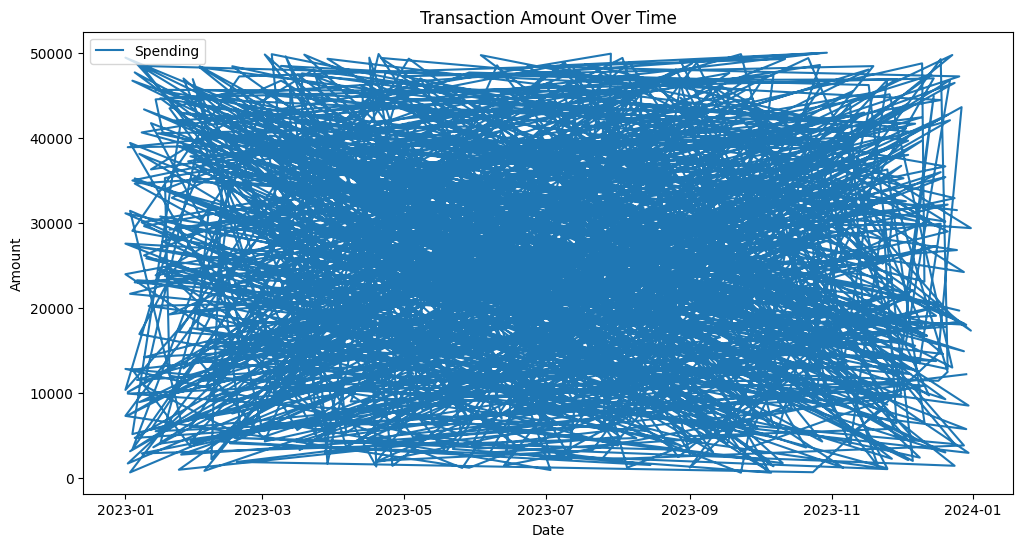

In [28]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Amount'], label='Spending')
plt.title('Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [29]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Create sequences of past data to predict the future
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step (number of previous days to use for prediction)
time_step = 30

# Create sequences
X, y = create_sequences(scaled_data, time_step)

# Reshape X to be compatible with LSTM input shape (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Check the shape of the data
print(X_train.shape, y_train.shape)


(852, 30, 1) (852,)


In [30]:
# Build the LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(30, 1), activation='relu', return_sequences=False))  # Correct usage
model.add(Dense(1))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


C:\Users\laxmi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2261
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0828
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0862
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0846
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0834
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0803
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0893
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0807
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0841
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0817
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0837
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0850
Epoch 13/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0783
Epoch 14/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0831
Epoch 15/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0811
Epoch 16/20


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


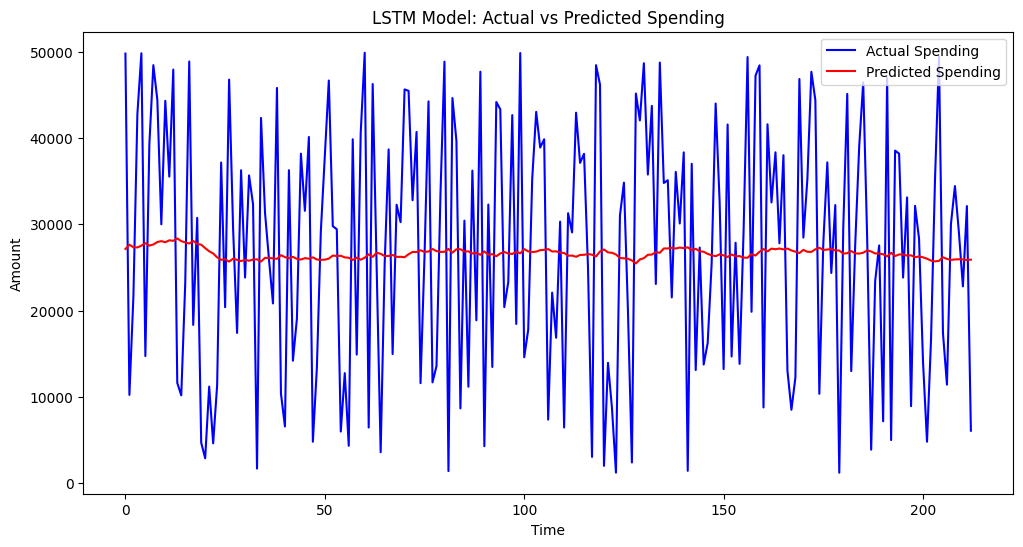

In [32]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions back to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Spending')
plt.plot(predictions, color='red', label='Predicted Spending')
plt.title('LSTM Model: Actual vs Predicted Spending')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 207783206.28883117


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

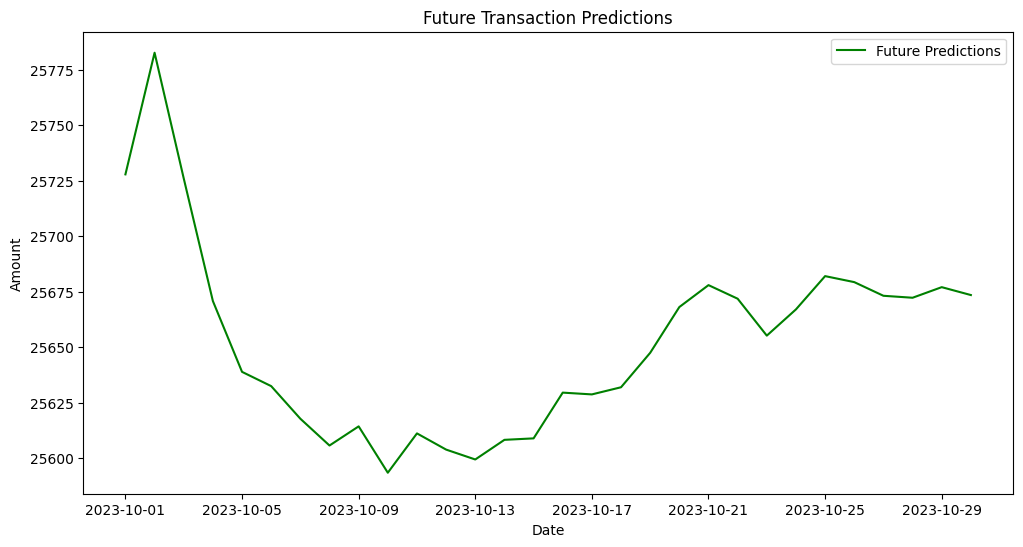

In [34]:
# Predict the next 30 days
input_seq = scaled_data[-time_step:].reshape(1, time_step, 1)  # Reshaping the input sequence
future_predictions = []

for _ in range(30):
    pred = model.predict(input_seq)  # Predict the next value
    future_predictions.append(pred[0, 0])  # Append the predicted value

    # Update the input sequence for the next prediction
    # Ensure that the new prediction is reshaped to match the input sequence dimensions
    pred_reshaped = pred.reshape(1, 1, 1)  # Reshape pred to (1, 1, 1)
    input_seq = np.append(input_seq[:, 1:, :], pred_reshaped, axis=1)  # Update input sequence

# Inverse transform the predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], future_predictions, color='green', label='Future Predictions')
plt.title('Future Transaction Predictions')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


Save the Trained Models

In [36]:
import pickle

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)  # Assuming `rf_model` is your Random Forest model


In [37]:
# Save LSTM model
from tensorflow.keras.models import load_model

# Correct way to load the Keras model
lstm_model = load_model('lstm_model.keras')

Deployment

In [39]:
import gradio as gr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Improved logic without showing required savings or editable categories
def improved_finance_dashboard(income, savings_goal, target_year):
    current_year = pd.Timestamp.now().year
    years_left = target_year - current_year
    months_left = max(1, years_left * 12)

    # Fixed example categories
    expense_dict = {
        "Rent": 20000,
        "Food": 8000,
        "Transport": 4000,
        "Entertainment": 5000,
        "Utilities": 3000,
        "Shopping": 6000
    }

    total_expenses = sum(expense_dict.values())
    monthly_savings = income - total_expenses
    required_monthly_savings = savings_goal / months_left
    need_to_cut = required_monthly_savings > monthly_savings
    savings_gap = required_monthly_savings - monthly_savings if need_to_cut else 0

    # Suggest savings plan if needed
    if need_to_cut:
        sorted_expenses = sorted(expense_dict.items(), key=lambda x: x[1], reverse=True)
        reduced_expense_dict = {}
        remaining_gap = savings_gap

        for category, amount in sorted_expenses:
            reducible = min(amount * 0.3, remaining_gap)
            reduced_expense_dict[category] = amount - reducible
            remaining_gap -= reducible
            if remaining_gap <= 0:
                break

        suggested_savings_plan = f"Adjust expenses to meet your goal:\n"
        for cat in reduced_expense_dict:
            original = expense_dict[cat]
            reduced = reduced_expense_dict[cat]
            if reduced < original:
                suggested_savings_plan += f"- {cat}: ₹{original:.0f} → ₹{reduced:.0f} (save ₹{original - reduced:.0f})\n"
        if remaining_gap > 0:
            suggested_savings_plan += f"Still need to save ₹{remaining_gap:.0f}/month more.\n"
    else:
        suggested_savings_plan = "Your current savings rate is sufficient to meet your goal."

    # Plot
    fig, ax = plt.subplots()
    years = np.arange(current_year, target_year + 1)
    predicted_savings = np.cumsum([monthly_savings * 12] * len(years))
    required_savings = np.linspace(0, savings_goal, len(years))

    ax.plot(years, predicted_savings, label="Predicted Savings", marker='o')
    ax.plot(years, required_savings, label="Required Savings", linestyle='--', marker='x')
    ax.set_title('Predicted vs Required Savings')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Savings')
    ax.legend()
    ax.grid(True)

    summary_text = (
        f"Total Monthly Expenses: ₹{total_expenses}\n"
        f"Current Monthly Savings: ₹{monthly_savings}\n"
        f" Time Left: {months_left} months ({years_left} years)\n"
    )

    return summary_text + "\n\n" + suggested_savings_plan, fig

# Gradio App Launcher
def launch_dashboard():
    with gr.Blocks() as demo:
        gr.Markdown("Personalized Finance Tracker")

        with gr.Row():
            income = gr.Number(label="Monthly Income (₹)", value=60000)
            savings_goal = gr.Number(label="Target Savings Goal (₹)", value=500000)
            target_year = gr.Number(label="Target Year to Reach Goal", value=2028, precision=0)

        submit_btn = gr.Button("Analyze & Suggest")

        summary = gr.Textbox(label="Summary + Suggestions", lines=6)
        line_plot = gr.Plot()

        submit_btn.click(
            fn=improved_finance_dashboard,
            inputs=[income, savings_goal, target_year],
            outputs=[summary, line_plot]
        )

    return demo

# Run the app
if __name__ == "__main__":
    launch_dashboard().launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
